 **Problem Statement** <br>
A classic problem in the field of pattern recognition is that of handwritten digit recognition. Suppose that you have images of handwritten digits ranging from 0-9 written by various people in boxes of a specific size - similar to the application forms in banks and universities.

 

The goal is to develop a model that can correctly identify the digit (between 0-9) written in an image. 

**Objective**<br>
You are required to develop a model using Support Vector Machine which should correctly classify the handwritten digits from 0-9 based on the pixel values given as features. Thus, this is a 10-class classification problem. 

# Load Libraries and dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np  # To deal with arrays and matrices
import pandas as pd # To deal with dataset

In [3]:
# Read the csv files using pandas
train_data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/train.csv") 

Since the training dataset is quite large (42,000 labelled images), it would take a lot of time for training an SVM on the full MNIST data, so we sub-sample the data for training (10-20% of the data, approx 8400 sample)

In [4]:
np.random.seed = 28 # Randomly select the data
train_data_index=np.random.randint(0,train_data.shape[0],8400)
train_data = train_data.iloc[train_data_index,:]

# Data Understanding

In [5]:
print("Train data rows and columns: ",train_data.shape)

Train data rows and columns:  (8400, 785)


In [6]:
train_data.head() # Display first 5 rows

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
39493,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
33688,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11326,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8272,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,230,98,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15981,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
train_data.isnull().sum() # To check if null values are present in dataset

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

**The train dataset has no null values.**

In [8]:
train_data.describe() #Display the description of dataset

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,8400.000000,8400.0,8400.0,8400.0,8400.0,8400.0,8400.0,8400.0,8400.0,8400.0,8400.0,8400.0,8400.0,8400.0,8400.0,8400.0,8400.0,8400.0,8400.0,8400.0,8400.0,8400.0,8400.0,8400.0,8400.0,8400.0,8400.0,8400.0,8400.0,8400.0,8400.0,8400.0,8400.0,8400.0,8400.0,8400.0,8400.000000,8400.000000,8400.000000,8400.000000,...,8400.000000,8400.000000,8400.000000,8400.000000,8400.000000,8400.000000,8400.000000,8400.000000,8400.0,8400.0,8400.0,8400.0,8400.0,8400.0,8400.0,8400.0,8400.0,8400.000000,8400.000000,8400.000000,8400.000000,8400.000000,8400.000000,8400.000000,8400.000000,8400.000000,8400.000000,8400.000000,8400.000000,8400.000000,8400.000000,8400.000000,8400.000000,8400.000000,8400.000000,8400.0,8400.0,8400.0,8400.0,8400.0
mean,4.435476,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009762,0.061548,0.107500,0.132143,...,4.062262,3.152619,1.747976,0.879524,0.426667,0.223214,0.062500,0.038214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009643,0.045357,0.165357,0.301190,0.312262,0.341667,0.513095,0.554405,0.574762,0.768095,0.637262,0.572619,0.400476,0.162381,0.017262,0.023452,0.010357,0.018333,0.0,0.0,0.0,0.0,0.0
std,2.889747,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.894693,3.485434,4.069522,4.933313,...,28.100771,25.077521,17.850717,12.829842,8.996625,6.532530,2.279238,2.105638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.883782,2.886959,4.890871,7.877137,7.652594,7.316460,10.054516,10.672199,9.856677,12.251960,10.617430,10.210638,8.741262,5.370814,0.877582,2.149446,0.837854,1.680278,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0000

In [9]:
# Check the unique entries of label column
np.unique(train_data['label'])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [10]:
train_data['label'].value_counts()

7    911
1    902
0    875
2    855
3    849
6    835
8    807
9    805
4    794
5    767
Name: label, dtype: int64

# Data Visualisation

In [11]:
# Import data visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns

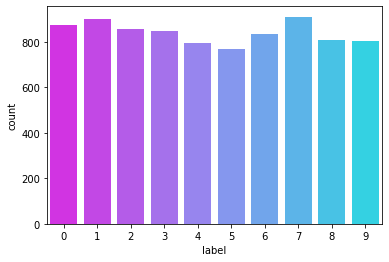

In [15]:
# Visualizing the number of class and counts in the datasets
sns.countplot(train_data["label"],palette = 'cool_r'); 

### Let us examine few pixels

Text(0, 0.5, 'Frequency')

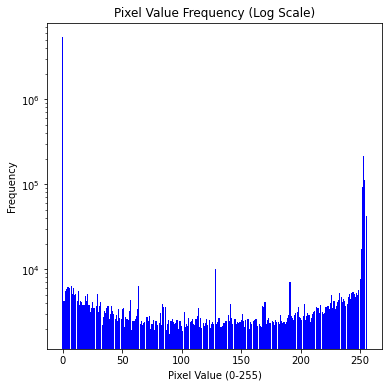

In [20]:
y = pd.value_counts(train_data.values.ravel()).sort_index()
N = len(y)
x = range(N)
width =0.9
plt.figure(figsize=[6,6])
plt.bar(x, y, width, color="blue")
plt.title('Pixel Value Frequency (Log Scale)')
plt.yscale('log')
plt.xlabel('Pixel Value (0-255)')
plt.ylabel('Frequency')

### Label vs pixel

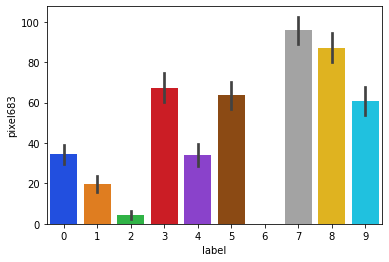

In [32]:
sns.barplot(x='label', y='pixel683', data=train_data,palette='bright');

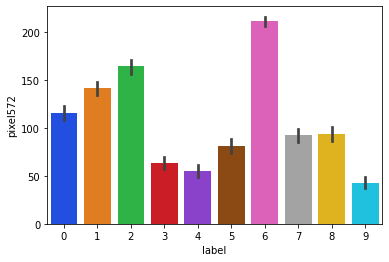

In [31]:
sns.barplot(x='label', y='pixel572', data=train_data, palette='bright');

### Let us visualise few numbers:

Text(0.5, 1.0, '1')

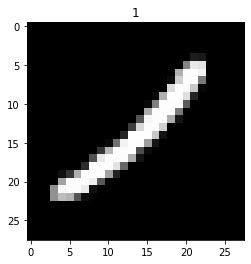

In [42]:
x = train_data.iloc[2, 1:]
x = x.values.reshape(28,28)
plt.imshow(x,cmap='gray')
title=train_data['label'][2]
plt.title(title)

Text(0.5, 1.0, '1')

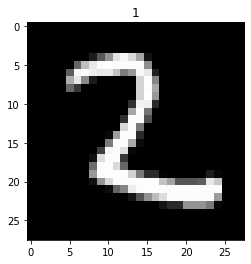

In [43]:
x = train_data.iloc[6, 1:]
x = x.values.reshape(28,28)
plt.imshow(x,cmap='gray')
title=train_data['label'][6]
plt.title(title)

# Data Preparation

### Averaging the feature values

In [44]:
# average feature values
round(train_data.drop('label', axis=1).mean(), 2)

pixel0      0.0
pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
           ... 
pixel779    0.0
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
Length: 784, dtype: float64

### Separating the dependent and independent variables

In [45]:
## Separating the X and Y variable
y = train_data['label']
## Dropping the variable 'label' from X variable
X = train_data.drop(columns = 'label')
## Printing the size of data
print(train_data.shape)

(8400, 785)


### Normalize data

In [46]:
# Normalization
X = X/255.0
print("X:", X.shape)

X: (8400, 784)


### Scale data

In [47]:
# scaling the features
from sklearn.preprocessing import scale
X_scaled = scale(X)

### Split Data into train and validation

In [48]:
from sklearn.model_selection import train_test_split
# train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, train_size =0.7)

# Model Building

In [49]:
# Importing the libraries to build the SVM model
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

### Building a Linear SVM model

In [50]:
# linear model
model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)
# predict
y_pred = model_linear.predict(X_test)

In [51]:
from sklearn import metrics  # for accuracy
from sklearn.metrics import confusion_matrix # for confusion matrix

In [52]:
# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")
# confusion matrix
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9119047619047619 

[[255   0   0   0   1   0   3   2   0   0]
 [  0 290   1   2   2   0   0   2   0   1]
 [  0   3 198   4   6   0   2   1   0   0]
 [  2   3   4 217   0  12   2   3   4   4]
 [  0   1   2   0 221   0   0   0   0   8]
 [  2   4   5   7   2 197   5   1   3   0]
 [  4   1   3   0   3   3 225   0   1   0]
 [  1   3   5   2   2   0   0 230   0  15]
 [  4   3   3  12   3   7   3   3 217   1]
 [  1   2   0   2  11   2   0  18   0 248]]


In [53]:
#precision, recall and f1-score
scores=metrics.classification_report(y_test, y_pred, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(scores)

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       261
           1       0.94      0.97      0.95       298
           2       0.90      0.93      0.91       214
           3       0.88      0.86      0.87       251
           4       0.88      0.95      0.92       232
           5       0.89      0.87      0.88       226
           6       0.94      0.94      0.94       240
           7       0.88      0.89      0.89       258
           8       0.96      0.85      0.90       256
           9       0.90      0.87      0.88       284

    accuracy                           0.91      2520
   macro avg       0.91      0.91      0.91      2520
weighted avg       0.91      0.91      0.91      2520



**We have achieved an accuracy of 91% with the help of linear SVM model.**

### Building non-linear SVM model using RBF kernel

In [54]:
# non-linear model using rbf kernel, C=1, default value of gamma
non_linear_model = SVC(kernel='rbf')
# fit model
non_linear_model.fit(X_train, y_train)
# predict model
y_pred = non_linear_model.predict(X_test)

In [55]:
# Calculate accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")
# Confusion Matrix
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9297619047619048 

[[255   0   2   0   0   0   4   0   0   0]
 [  0 289   2   2   1   1   0   1   1   1]
 [  1   0 204   2   3   0   3   1   0   0]
 [  1   2  10 228   0   4   1   3   1   1]
 [  0   1   1   0 227   0   0   0   0   3]
 [  0   2   5   2   0 208   7   0   2   0]
 [  2   1  10   0   2   1 224   0   0   0]
 [  1   2   7   0   4   0   0 234   0  10]
 [  4   4   5   7   2   8   1   2 221   2]
 [  2   0   6   2   6   1   0  14   0 253]]


In [56]:
#precision, recall and f1-score
scores=metrics.classification_report(y_test, y_pred, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(scores)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       261
           1       0.96      0.97      0.96       298
           2       0.81      0.95      0.88       214
           3       0.94      0.91      0.92       251
           4       0.93      0.98      0.95       232
           5       0.93      0.92      0.93       226
           6       0.93      0.93      0.93       240
           7       0.92      0.91      0.91       258
           8       0.98      0.86      0.92       256
           9       0.94      0.89      0.91       284

    accuracy                           0.93      2520
   macro avg       0.93      0.93      0.93      2520
weighted avg       0.93      0.93      0.93      2520



**We have achieved an accuracy of 93% approx by building a non-linear SVM model using RBF kernel.**

We will now try to tune in our hyperparameters to improve the accuracy.

## Grid Search: Hyperparameter Tuning:

In [57]:
# creating a KFold object with 5 splits
folds = KFold(n_splits = 5, shuffle = True, random_state = 10)
# specify range of hyperparameters and set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],'C': [5,10]}]
# specify model
model = SVC(kernel="rbf")
# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, param_grid = hyper_params,
                        scoring= 'accuracy',cv = folds,verbose = 1,
                        return_train_score=True) 
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 21.3min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=10, shuffle=True),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [5, 10], 'gamma': [0.01, 0.001, 0.0001]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=1)

In [58]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,43.183779,0.215039,6.263138,0.226206,5,0.01,"{'C': 5, 'gamma': 0.01}",0.783163,0.782313,0.743197,0.764456,0.731293,0.760884,0.020769,5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,10.425212,0.071576,3.408334,0.052114,5,0.001,"{'C': 5, 'gamma': 0.001}",0.943027,0.941327,0.930272,0.941327,0.928571,0.936905,0.006165,2,0.997236,0.997449,0.997236,0.997024,0.997024,0.997194,0.000159
2,9.929614,0.039062,3.610510,0.024485,5,0.0001,"{'C': 5, 'gamma': 0.0001}",0.933673,0.921769,0.919218,0.917517,0.916667,0.921769,0.006202,4,0.946429,0.950468,0.951318,0.949405,0.949405,0.949405,0.001652
3,43.339500,0.443365,6.179460,0.052243,10,0.01,"{'C': 10, 'gamma': 0.01}",0.783163,0.782313,0.743197,0.764456,0.731293,0.760884,0.020769,5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,10.331604,0.080817,3.370808,0.008985,10,0.001,"{'C': 10, 'gamma': 0.001}",0.944728,0.938776,0.932823,0.942177,0.929422,0.937585,0.005707,1,0.999150,0.999150,0.999362,0.999362,0.999150,0.999235,0.000104
5,8.132794,0.044637,3.166326,0.019789,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.936224,0.926020,0.920918,0.926020,0.920918,0.926020,0.005589,3,0.960034,0.963648,0.965136,0.962798,0.963435,0.963010,0.001674


### Plot the graphs for the Train vs Test accuracy

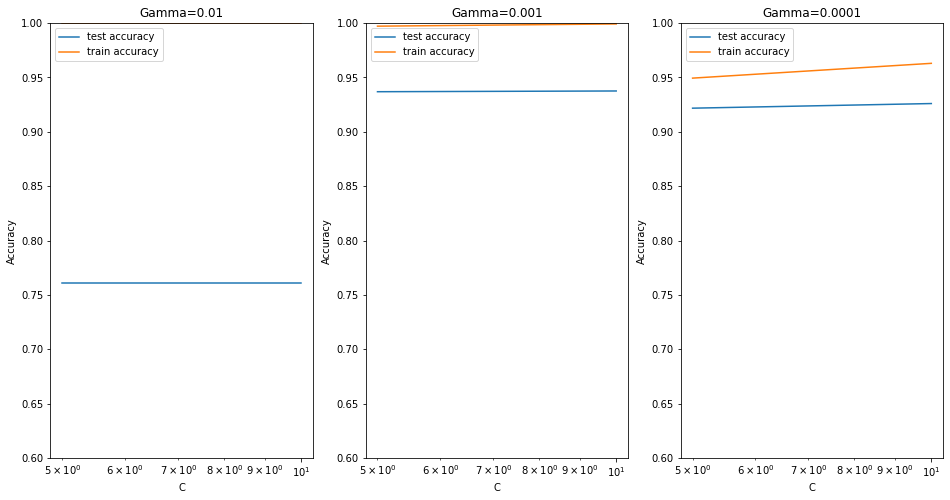

In [60]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')
# # plotting
plt.figure(figsize=(16,8))
# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]
plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')
# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]
plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')
# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]
plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"]) 
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

In [61]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_
print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9375850340136054 corresponding to hyperparameters {'C': 10, 'gamma': 0.001}


Build the final model with the optimal hyperparameters

In [62]:
# model with optimal hyperparameters
# model
model = SVC(C=10, gamma=0.001, kernel="rbf")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# metrics
print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")
print(metrics.confusion_matrix(y_test, y_pred), "\n")

accuracy 0.9424603174603174 

[[256   0   2   0   0   0   3   0   0   0]
 [  0 290   1   3   2   0   0   1   1   0]
 [  1   0 208   3   1   0   1   0   0   0]
 [  1   3   5 231   0   2   2   5   1   1]
 [  0   1   2   0 227   0   0   0   0   2]
 [  1   1   3   1   0 212   5   1   2   0]
 [  2   1  10   0   2   2 223   0   0   0]
 [  1   3   7   0   4   0   0 238   0   5]
 [  2   3   2  10   2   7   1   1 226   2]
 [  1   0   2   2   3   1   0  11   0 264]] 



In [63]:
# different class-wise accuracy - #precision, recall and f1-score
scores=metrics.classification_report(y_test, y_pred, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(scores)

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       261
           1       0.96      0.97      0.97       298
           2       0.86      0.97      0.91       214
           3       0.92      0.92      0.92       251
           4       0.94      0.98      0.96       232
           5       0.95      0.94      0.94       226
           6       0.95      0.93      0.94       240
           7       0.93      0.92      0.92       258
           8       0.98      0.88      0.93       256
           9       0.96      0.93      0.95       284

    accuracy                           0.94      2520
   macro avg       0.94      0.94      0.94      2520
weighted avg       0.94      0.94      0.94      2520



**Finally, after tuning our hyperparameters we achieve an accuracy of 94% approx.**

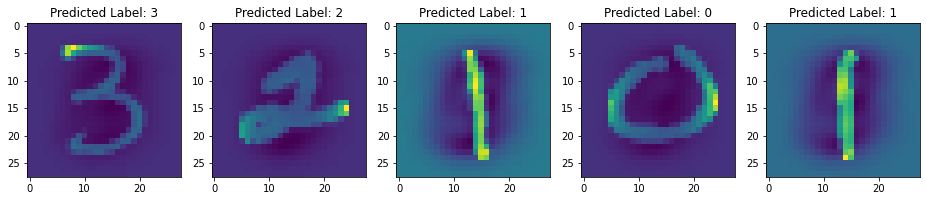

In [64]:
# Let us visualize our final model on unseen training dataset

df = np.random.randint(1,y_pred.shape[0]+1,5)

plt.figure(figsize=(16,4))
for i,j in enumerate(df):
    plt.subplot(150+i+1)
    d = X_test[j].reshape(28,28)
    plt.title(f'Predicted Label: {y_pred[j]}')
    plt.imshow(d)
plt.show()

## Let us use our final model on test data

In [65]:
#import file and reading few lines
test_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/test.csv')
test_df.head(10)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [66]:
test_df.shape

(28000, 784)

In [67]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [69]:
test_df = test_df/255.0
print("test_data:", test_df.shape)

test_data: (28000, 784)


In [70]:
test_scaled = scale(test_df)

In [71]:
test_predict = model.predict(test_scaled)

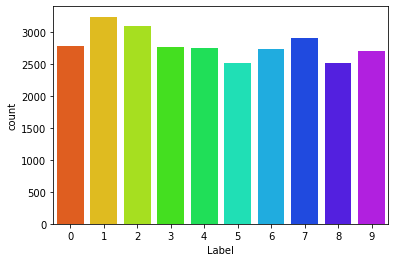

In [75]:
# Plotting the distribution of prediction
a = {'ImageId': np.arange(1,test_predict.shape[0]+1), 'Label': test_predict}
data_to_export = pd.DataFrame(a)
sns.countplot(data_to_export['Label'], palette = 'gist_rainbow');

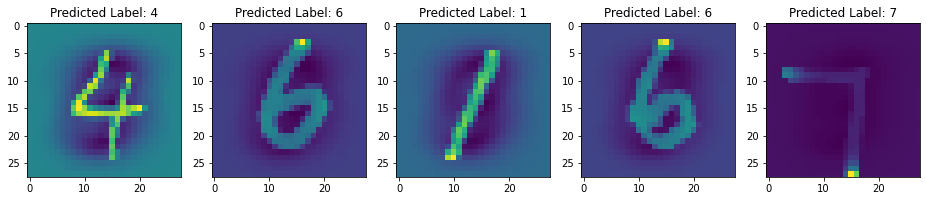

In [73]:
# Let us visualize few of predicted test numbers

df = np.random.randint(1,test_predict.shape[0]+1,5)

plt.figure(figsize=(16,4))
for i,j in enumerate(df):
    plt.subplot(150+i+1)
    d = test_scaled[j].reshape(28,28)
    plt.title(f'Predicted Label: {test_predict[j]}')
    plt.imshow(d)
plt.show()

## **Conclusion**
The accuracy achieved using a non-linear kernel (0.94) 
is a bit higher than that of a linear one (0.91). We can conclude that the problem is non-linear in nature.